In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [4]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

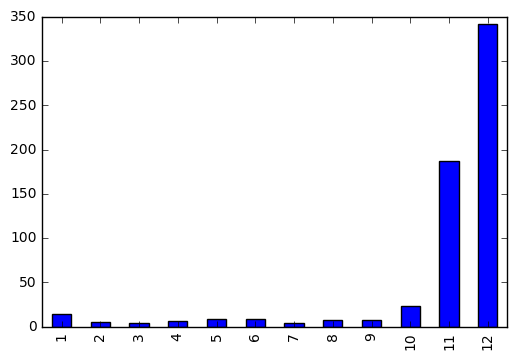

In [5]:
#find all titles including "Christmas" in their title in release_dates
#take the date column, convert to DatetimeIndex, and find the month -> returns an array
#convert the array to a series, so that we can then find the count of each month using value_counts
#sort by index so we can see by month: makes for a more meaningful graph...
#finally make a bar plot as requested

pd.Series(pd.DatetimeIndex(\
        release_dates.loc[release_dates.title.str.contains("Christmas")].date).month)\
.value_counts().sort_index().plot.bar()

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

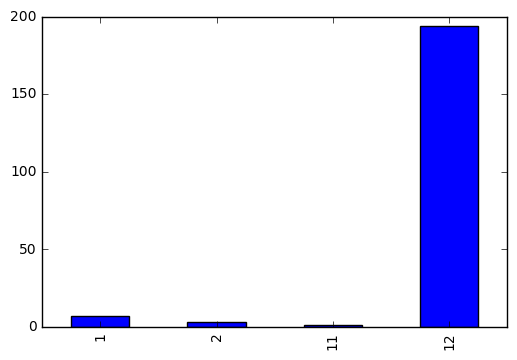

In [6]:
pd.Series(pd.DatetimeIndex(\
        release_dates.loc[release_dates.title.str.contains("The Hobbit")].date).month)\
.value_counts().sort_index().plot.bar()

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

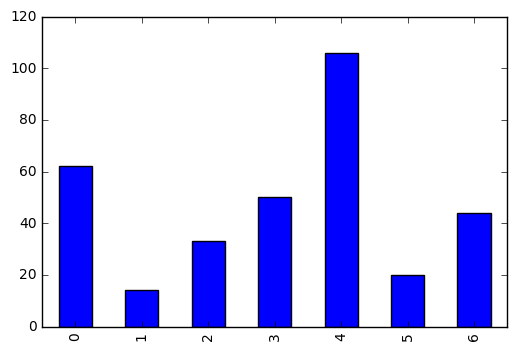

In [7]:
pd.Series(pd.DatetimeIndex(\
        release_dates.loc[release_dates.title.str.contains("Romance")].date).dayofweek)\
.value_counts().sort_index().plot.bar()

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

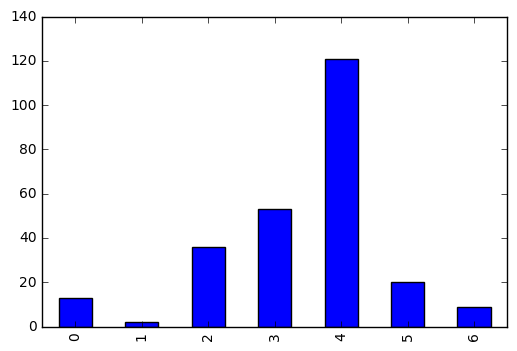

In [8]:
pd.Series(pd.DatetimeIndex(\
        release_dates.loc[release_dates.title.str.contains("Action")].date).dayofweek)\
.value_counts().sort_index().plot.bar()

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [63]:
my_title = pd.DataFrame(cast.loc[cast.name.str.contains("Judi Dench") & (cast.year // 10 == 199)].title)
rs = pd.merge(my_title, release_dates.loc[release_dates.country == 'USA'], on='title').loc[:,['title','date']]
rs

,title,date
0,GoldenEye,1995-11-17
1,Hamlet,1910-02-02
2,Hamlet,1911-04-15
3,Hamlet,1921-11-08
4,Hamlet,1991-01-18
5,Hamlet,1996-12-25
6,Hamlet,2000-06-23
7,Hamlet,2014-01-10
8,Jack & Sarah,1996-03-22
9,Mrs Brown,1997-10-03


### In which months do films with Judi Dench tend to be released in the USA?

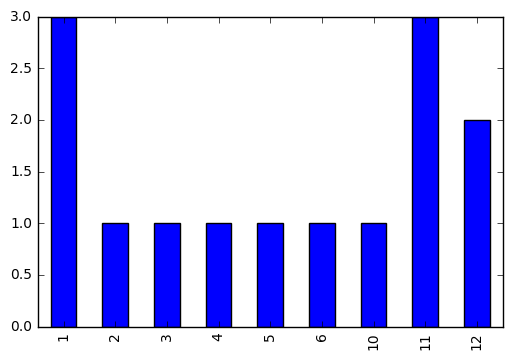

In [68]:
pd.Series(pd.DatetimeIndex(rs.date).month).value_counts().sort_index().plot.bar()

In [69]:
del my_title, rs

### In which months do films with Tom Cruise tend to be released in the USA?

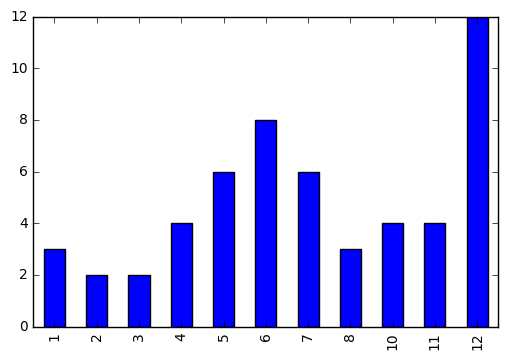

In [86]:
release_dates.head()
pd.Series(pd.DatetimeIndex(pd.merge(\
    cast.loc[cast.name == 'Tom Cruise'].loc[:,['title']],\
    release_dates.loc[release_dates.country == 'USA'],\
    on='title').date).month).value_counts().sort_index().plot.bar()